# Домашнее задание "Случайные величины и вероятности".

## Уровень 0:


### Задание 1

В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [2]:
P = 0.2*0.1 + 0.3*0.05 + 0.5*0.2
P

0.135

### Задание 2


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

События А и В называются независимыми, если P(AB)=P(A)P(B)

In [6]:
[0,0,0] - A1 A2 A3
[0,0,1] - A1
[0,1,0] -       A3
[1,0,0] -    A2
[0,1,1] -    A2
[1,1,0] - A1
[1,0,1] -       A3
[1,1,1] - A1 A2 A3

P(A1) = 0.5
P(A2) = 0.5
P(A3) = 0.5

P(A1A2) = 2/8 что равно P(A1)*P(A2)
P(A1A3) = 2/8 что равно P(A1)*P(A3)
P(A2A3) = 2/8 что равно P(A2)*P(A3)

=> попарно независимы

P(A1A2A3) = 2/8 неравно P(A1)*P(A2)*P(A3)= 1/8 

=> не являются независимыми в совокупности

## Уровень 1:

### Задание 3


Изучите 3 распределения из библиотеки scipy: [Нормальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Экспоненциальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [Стьюдента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Используя функцию плотности распредления (`pdf`), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения. 

Дополнительная информация [тут](https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html).

In [3]:
from scipy.stats import norm, expon, t
import numpy as np
import matplotlib.pyplot as plt

In [4]:
norm.ppf(0.01)

-2.3263478740408408

loc — параметр сдвига 

scale — параметр масштаба

In [6]:
sample = norm(loc=2, scale=3).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [ 4.16616974  0.22733107  8.96907029  4.61287157  7.62011199  3.29681831
 -1.59470091  1.6883611   3.18196066  3.13428237]
Выборочное среденее: 2.093
Выборочная дисперсия: 10.369


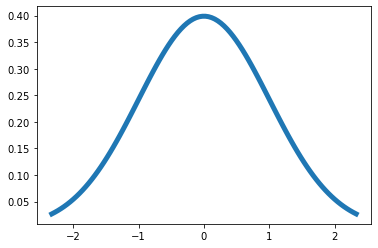

In [11]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x), lw=5, label='norm pdf')

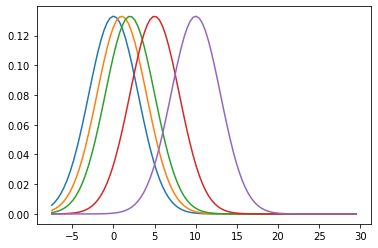

In [12]:
loc_params = (0, 1, 2, 5, 10)

fig, ax = plt.subplots(1, 1)
x = np.linspace(-7.5, 29.5, 100)

for loc in loc_params:
    ax.plot(x, norm(loc=loc, scale=3).pdf(x))


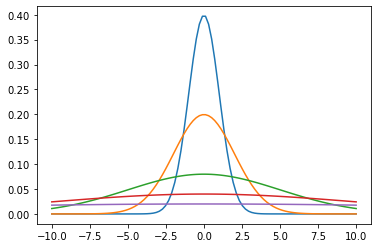

In [13]:
scale_params = (1, 2, 5, 10, 20)

fig, ax = plt.subplots(1, 1)
x = np.linspace(-10, 10, 100)

for scale in scale_params:
    ax.plot(x, norm(scale=scale).pdf(x))


In [14]:
expon.ppf(0.99)

4.605170185988091

In [15]:
expon(loc=20).ppf(0.01)

20.010050335853503

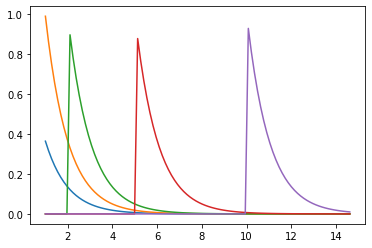

In [16]:
x = np.linspace(expon(loc=1).ppf(0.01), expon(loc=10).ppf(0.99), 100)

loc_params = (0, 1, 2, 5, 10)
scale_params = (1, 2, 5, 10)

fig, ax = plt.subplots(1, 1)

for loc in loc_params:
    ax.plot(x, expon(loc=loc).pdf(x))


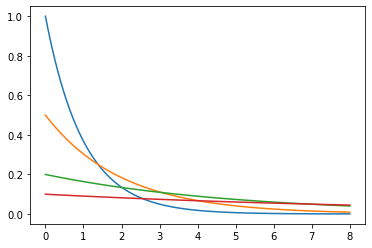

In [17]:
x = np.linspace(0, 8, 100)

fig, ax = plt.subplots(1, 1)

for scale in scale_params:
    ax.plot(x, expon(scale=scale).pdf(x))

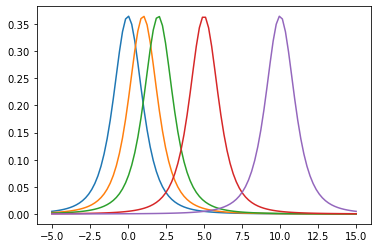

In [18]:
x = np.linspace(-5, 15, 100)

df_params = (0, 1, 2.74, 5, 100)
loc_params = (0, 1, 2, 5, 10)
scale_params = (1, 2, 5, 10)

fig, ax = plt.subplots(1, 1)

for loc in loc_params:
    ax.plot(x, t(df=2.74, loc=loc).pdf(x))

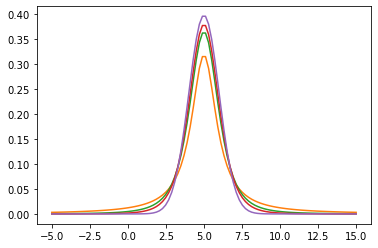

In [19]:
fig, ax = plt.subplots(1, 1)

for df in df_params:
    ax.plot(x, t(df=df, loc=5).pdf(x))

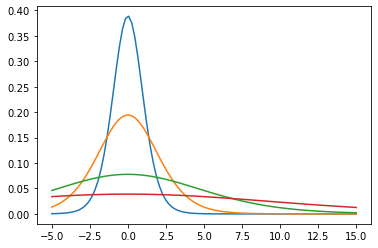

In [20]:
fig, ax = plt.subplots(1, 1)

for scale in scale_params:
    ax.plot(x, t(df=10, loc=0, scale=scale).pdf(x))

In [21]:
#loc определяет среднее значение, матожидание. Отвечает за смещение кривой вдоль Ox
#scale задает стандартное отклонение.Отвечает за смещение экстремума вдоль Oy и "прижимание" кривой к вертикальной прямой
#количество степеней свободы df, которое вычисляется как n - 1. 